In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [46]:
 df = pd.read_excel("Models\IWA_new.xlsx", sheet_name='Final Raw Sample(0%)')

In [47]:
molson = df[df['Company Name'] == 'MOLSON COORS BEVERAGE CO']
#airline_df.groupby("Company Name").describe
molson

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Revenue,Operating Income,Total Environmental Cost,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
517,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.065962,-0.465228,1.057940e+10,1.500000e+09,-6.978419e+08,...,-3.977745e+08,-77571.792798,-1113.208360,-326.988191,-37024.568588,-1326.865949,15176.840942,15176.840942,-12261.768244,0.059202
2194,2018,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.044481,-0.361156,1.076960e+10,1.326400e+09,-4.790377e+08,...,-1.594598e+08,-78966.404495,-1133.221993,-332.866895,-39277.764892,-1350.720790,15449.695276,15449.695276,-13060.087217,0.083980
3815,2017,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.043811,-0.279219,1.100280e+10,1.726400e+09,-4.820440e+08,...,-1.556207e+08,-80676.306954,-1157.760264,-340.074642,-40119.876325,-1379.968681,15784.235922,15784.235922,-13339.829917,0.085090
5728,2016,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.023815,-0.239472,4.885000e+09,4.858000e+08,-1.163353e+08,...,-5.295083e+07,-35818.497062,-514.019967,-150.985624,-8641.781920,-612.675592,7007.851863,7007.851863,-2584.493608,0.140587
7017,2015,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.038418,-0.360489,3.567500e+09,3.802000e+08,-1.370578e+08,...,-6.597283e+07,-26041.446705,-373.712597,-109.772448,-9094.798316,-445.439091,5094.982084,5094.982084,-2902.558191,0.094867
8504,2014,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.036238,-0.314467,4.146300e+09,4.778000e+08,-1.502522e+08,...,-6.131684e+07,-27982.157190,-401.563122,-117.953120,-11184.359704,-478.634955,5474.680081,5474.680081,-3632.758703,0.093264
9886,2013,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.039152,-0.356445,4.206100e+09,4.620000e+08,-1.646777e+08,...,-6.997113e+07,-26240.003729,-376.562027,-110.609424,-11759.828655,-448.835410,5133.829560,5133.829560,-3869.522589,0.081540
11175,2012,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.035843,-0.288963,3.916500e+09,4.858000e+08,-1.403782e+08,...,-8.112146e+07,-25299.859176,-363.070308,-106.646435,-7733.188929,-432.754232,4949.891252,4949.891252,-2418.547980,0.090688
12312,2011,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.038842,-0.295645,3.515700e+09,4.619000e+08,-1.365585e+08,...,-7.483230e+07,-25370.384780,-364.082399,-106.943722,-8013.908265,-433.960573,4963.689513,4963.689513,-2519.625387,0.093072
13364,2010,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,Manufacture of beverages,-0.045484,-0.341855,3.254400e+09,4.330000e+08,-1.480234e+08,...,-1.133590e+08,-22823.399686,-679.755640,-96.272976,-10895.552725,-810.220840,9670.848304,9670.848304,-1611.055691,0.010385


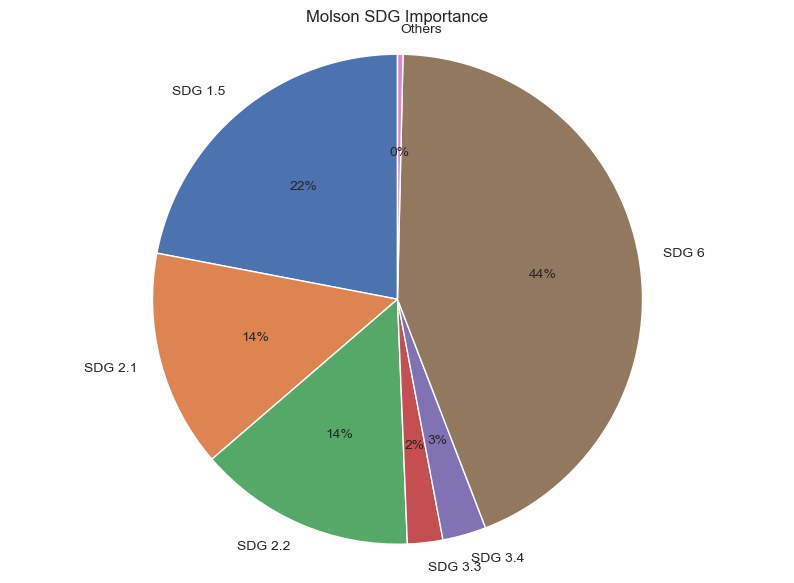

In [49]:
pie_chart_SDG = molson.loc[:,"SDG 1.5":"SDG 15.5"]
# Calculate the sum of each column
abs_sums = pie_chart_SDG.abs().sum()

# Compute the percentages
total = abs_sums.sum()
percentages = (abs_sums / total) * 100

# Set a threshold (e.g., 1.0%) and filter out small values
threshold = 1.0
mask_small = percentages < threshold
small_sums = abs_sums[mask_small]

# Create "Others" category
if small_sums.sum() > 0:
    abs_sums = abs_sums[~mask_small]
    abs_sums['Others'] = small_sums.sum()

# Get the colors from Seaborn's "deep" palette
colors = sns.color_palette("deep", len(abs_sums))

# Create the pie chart
plt.figure(figsize=(10, 7))
plt.pie(abs_sums, labels=abs_sums.index, colors=colors, autopct='%1.f%%', startangle=90)
plt.title("Molson SDG Importance")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

Text(0.5, 1.0, 'Revenue and Environmental Intensity over Time')

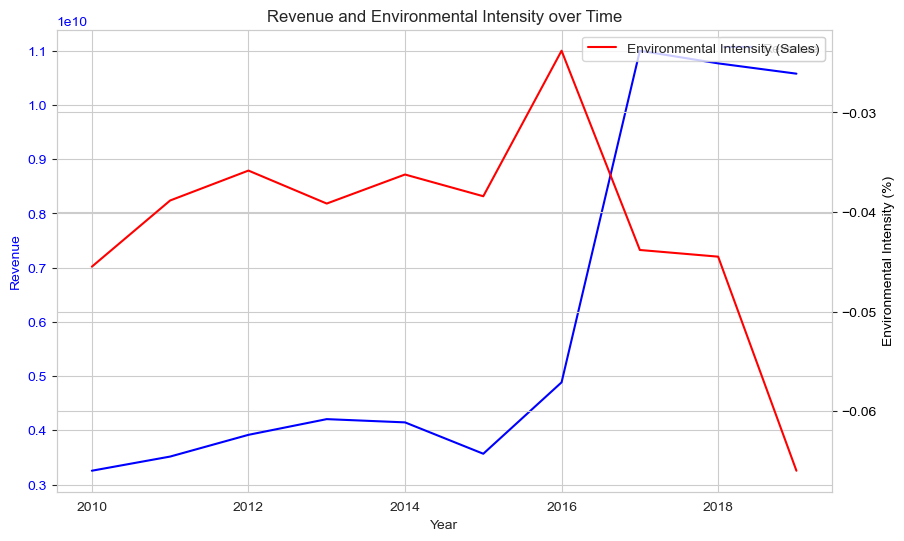

In [41]:
# Set the style
sns.set_style("whitegrid")

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Absolute Values on the primary y-axis
sns.lineplot(data=molson, x='Year', y='Revenue', ax=ax1, color='b', label='Revenue')
ax1.set_ylabel('Revenue', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=molson, x='Year', y='Environmental Intensity (Sales)', ax=ax2, color='r', label='Environmental Intensity (Sales)')
ax2.set_ylabel('Environmental Intensity (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

#sns.lineplot(data=molson, x='Year', y='Environmental Intensity (Op Inc)', ax=ax2, color='g', label='Environmental Intensity (Op Inc)')

# Set title and display the plot
plt.title("Revenue and Environmental Intensity over Time")
#plt.show()

c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

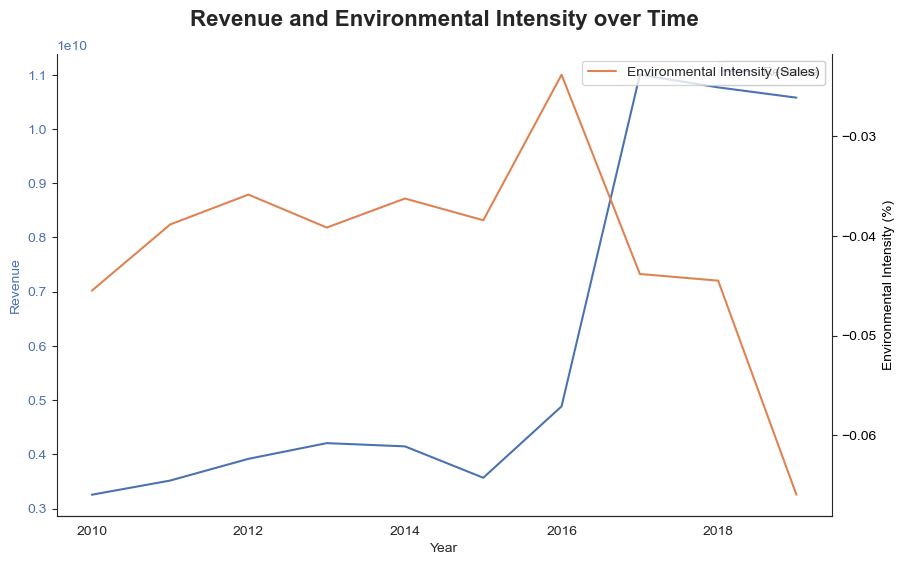

In [42]:
# Set the style to a clean white background
sns.set_style("white")

# Create the figure and the first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Use a neutral, desaturated color palette
palette = sns.color_palette("deep")

# Plot the Absolute Values on the primary y-axis
sns.lineplot(data=molson, x='Year', y='Revenue', ax=ax1, color=palette[0], label='Revenue')
ax1.set_ylabel('Revenue', color=palette[0])
ax1.tick_params(axis='y', labelcolor=palette[0])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Create a secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=molson, x='Year', y='Environmental Intensity (Sales)', ax=ax2, color=palette[1], label='Environmental Intensity (Sales)')
ax2.set_ylabel('Environmental Intensity (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

# Optional third line
# sns.lineplot(data=molson, x='Year', y='Environmental Intensity (Op Inc)', ax=ax2, color=palette[2], label='Environmental Intensity (Op Inc)')

# Set title with improved settings
plt.title("Revenue and Environmental Intensity over Time", fontsize=16, fontweight='bold', pad=20)

# Display the plot
plt.show()


In [37]:
# # Style
# sns.set_style("whitegrid")

# # Figure and first axis
# fig, ax1 = plt.subplots(figsize=(10, 6))

# # Plot Bars on ax1
# sns.barplot(data=molson, x='Year', y='Revenue', ax=ax1, color='g', alpha=0.6, label='Revenue')
# ax1.set_ylabel('Revenue', color='g')
# ax1.tick_params(axis='y', labelcolor='g')

# # Create a secondary y-axis for Line1
# ax2 = ax1.twinx()
# sns.lineplot(data=molson, x='Year', y='Environmental Intensity (Sales)', ax=ax2, color='b', label='Line1')
# ax2.set_ylabel('Line1', color='b')
# ax2.tick_params(axis='y', labelcolor='b')

# # Plot Line2 on the same ax2
# sns.lineplot(data=molson, x='Year', y='Environmental Intensity (Op Inc)', ax=ax2, color='r', linestyle='--', label='Line2')

# # Legend
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# plt.title("Bars, Line1, and Line2 over Time")
# plt.show()